In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def RSS(r, X):
    return ((r - X) ** 2).sum()


# generate demo data
X_df = pd.Series(np.random.randint(0, 10, 40))
y_df = 5 * X_df + 5

# convert to numpy arrays
X = X_df.to_numpy()
y = y_df.to_numpy()

# sort data based on X
sort_index = np.argsort(X)
X = X[sort_index]
y = y[sort_index]

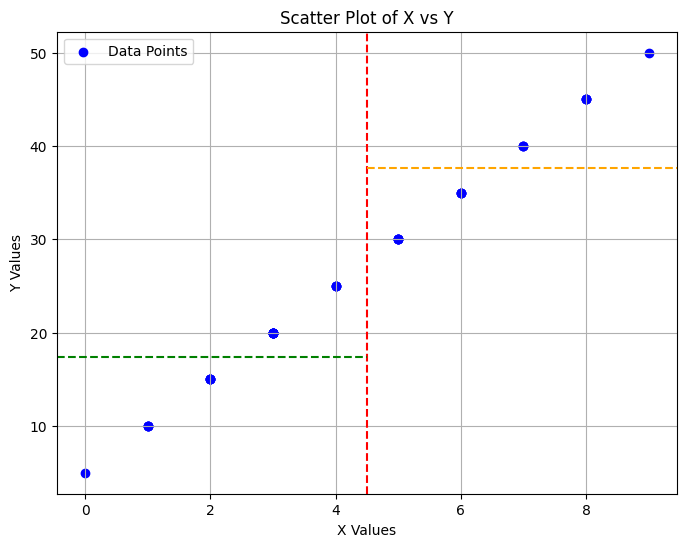

In [2]:
# concept rss
c_threshold = 4.5

c_low = np.take(y, np.where(X < c_threshold))
c_high = np.take(y, np.where(X >= c_threshold))

c_pred_low = c_low.mean()
c_pred_high = c_high.mean()

c_rss = RSS(c_pred_low, c_low) + RSS(c_pred_high, c_high)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.axvline(c_threshold, color='red', linestyle='--')
plt.axhline(c_pred_low, xmin=0, xmax=c_threshold / max(X), color='green', linestyle='--')
plt.axhline(c_pred_high, xmin=c_threshold / max(X), xmax=max(X), color='orange', linestyle='--')

# Add labels and title
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of X vs Y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [3]:
# concept rss
def calculate_rss(X_data, y_data, threshold):
    # get y values where x < threshold
    low = np.take(y_data, np.where(X_data < threshold))
    # get y values where x >= threshold
    high = np.take(y_data, np.where(X_data >= threshold))

    pred_low = low.mean() if len(low[0]) > 0 else 0
    pred_high = high.mean() if len(high[0]) > 0 else 0

    return RSS(pred_low, low) + RSS(pred_high, high)

In [4]:
def find_best_split(X_data, y_data):
    # Generate pairs of adjacent elements
    best_split = None
    min_rss = float('inf')  # Initialize the minimum RSS with a very large number

    for i in range(len(X_data) - 1):
        threshold = X_data[i:i + 2].mean()  # Calculate the threshold as the mean of x1 and x2
        print(f"Calculating RSS with threshold: {threshold}")

        rss = calculate_rss(X_data, y_data, threshold)  # Calculate RSS for the threshold

        # If this RSS is smaller than the current minimum, update the best_split
        if rss < min_rss:
            min_rss = rss
            best_split = (threshold, rss)

    return best_split


t, rs = find_best_split(X, y)
print(t)
print(rs)

Calculating RSS with threshold: 0.5
0.5
4957.692307692308


In [17]:
class Tree:
    def __init__(self, min_nodes=2, max_depth=5):
        self.root = None
        self.min_nodes = min_nodes
        self.max_depth = max_depth

    def create(self, X, y, depth):
        # if split criteria is reached make node to leaf node and set its avg value
        if len(X) < self.min_nodes or depth >= self.max_depth:
            return Node(value=np.mean(y))

        # find the best splits for every feature
        best_splits = [find_best_split(x_feature, y) for x_feature in X]
        # index of the feature with the min rss (rss i the second value of the tuple 
        best_feature_index = np.argmin([split[1] for split in best_splits])
        threshold = best_splits[best_feature_index][0]

        left_tree = self.create(X, y, depth + 1)
        right_tree = self.create(X, y, depth + 1)
        return Node(left=left_tree, right=right_tree, threshold=threshold, feature_index=best_feature_index)

    def split(self, X, y):
        pass


class Node:
    def __init__(self, threshold=None, value=None, left=None, right=None, feature_index=None):
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right
        self.feature_index = feature_index

    def is_leaf(self):
        return self.value is not None

In [25]:
import numpy as np

# Example 2D array
X = np.array([[1, 2, 3, 5],
              [4, 5, 6, 5],
              [7, 8, 9, 5]])
# Example 2D array
Y = np.array([1, 2, 3])

instances, num_features = X.shape

feature_index = 0
thresh = 2
x_feature = X[:, feature_index]


def split(x, y, threshold):
    mask_left = x <= threshold
    mask_right = x > threshold

    x_left = x[mask_left]
    y_left = y[mask_left]

    x_right = x[mask_right]
    y_right = y[mask_right]
   
    return x_left, y_left, x_right, y_right

In [10]:
import numpy as np

# Example 2D array
X = np.array([[1, 2, 3, 5],
              [4, 5, 6, 5],
              [7, 8, 9, 5]])

[x**2 for x in X.T]

y = np.array([(1,10), (1, 10), (2, 20), (3, 30)])
v = np.argmin(y[:,1])
y[v]

array([ 1, 10])